# Import Packages 

In [1]:
import pandas as pd
import numpy as np

# Import Data

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Check for Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Check for Missing Values

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Define our Target feature/ X features
- Round 1 - Only Numericals

In [8]:
numerical_features = df.drop(['id', 'date','price'], axis = 1).select_dtypes(include = 'number').columns.tolist()
numerical_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [9]:
y = df['price'] 
X = df[numerical_features]

# Build Model

In [11]:
# Import the Package, API
from sklearn.linear_model import LinearRegression

In [12]:
# Create an instance
lr = LinearRegression()

In [13]:
# Fit Model
lr.fit(X, y)

LinearRegression()

In [15]:
# Predict Price
y_pred = lr.predict(X)

# Performance Metrics
- R Sq
- MSE
- RMSE
- MAPE

In [16]:
# Import metrics packages
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [18]:
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))
print(mean_squared_error(y, y_pred, squared=False))
print(mean_absolute_percentage_error(y, y_pred))

0.7001341833975063
40467821947.024635
201166.1550734234
0.2554946318646629


# Feature Importance

In [19]:
# Intercerpt
lr.intercept_

6564121.115952789

In [20]:
lr.coef_

array([-3.55636483e+04,  4.12789157e+04,  1.10185038e+02,  1.28930020e-01,
        6.47417256e+03,  5.83250799e+05,  5.27830474e+04,  2.67945214e+04,
        9.70133621e+04,  7.07360404e+01,  3.94489975e+01, -2.62781834e+03,
        1.98314584e+01, -5.81850390e+02,  6.02158637e+05, -2.15585455e+05,
        2.11590870e+01, -3.90695439e-01])

In [24]:
feat_dict = { 'feature_name': numerical_features, 'feature_coef' : lr.coef_}
feat_importance = pd.DataFrame(feat_dict)

<AxesSubplot:>

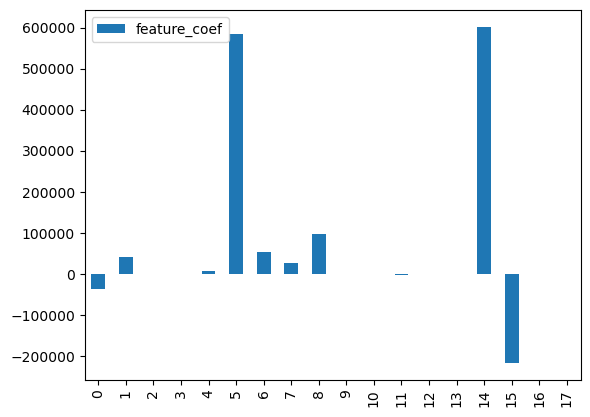

In [25]:
feat_importance.plot.bar()